In [199]:
import networkx as nx
import numpy as np
import pandas as pd
import itertools

import matplotlib.pyplot as plt

In [337]:
cat_path  = "cat.csv"
data_path = "data.csv"

all_cat = open(cat_path, 'r').read().split(",")
all_cat.append("q-fin")
all_cat.append("econ")
all_cat.sort()

df      = pd.read_csv(data_path)

In [338]:
df.head()

,Author,Fields
0,R. Blute,gr-qc;math;gr-qc;quant-ph;math;math;math;cs;ma...
1,Chengyan Liu,math;math;math;physics;math;cs;math;math;math;...
2,Stefan Johansson,math;math;cs;cs;physics;alg-geom;alg-geom;astr...
3,E. Formenti,nlin;cs;physics;physics;physics;cs;cs;q-fin;q-...
4,Joel Huselius,cs;cs;cs;cs;cs;gr-qc;hep-lat;hep-lat;hep-lat;h...


In [339]:
# Initialize graph
G = nx.Graph()
# Adding the node to graph
G.add_nodes_from(all_cat)

In [384]:
# alg-geom is listed ad math.AG
df["Fields"] = df["Fields"].apply(lambda x: x.replace("alg-geom", "math"))
df["Fields"] = df["Fields"].apply(lambda x: x.replace("patt-sol", "nlin"))
df["Fields"] = df["Fields"].apply(lambda x: x.replace("adap-org", "nlin"))
df["Fields"] = df["Fields"].apply(lambda x: x.replace("dg-ga", "math"))
df["Fields"] = df["Fields"].apply(lambda x: x.replace("q-alg", "math"))
df["Fields"] = df["Fields"].apply(lambda x: x.replace("chem-ph", "physics"))
df["Fields"] = df["Fields"].apply(lambda x: x.replace("solv-int", "nlin"))
df["Fields"] = df["Fields"].apply(lambda x: x.replace("chao-dyn", "nlin"))
df["Fields"] = df["Fields"].apply(lambda x: x.replace("mtrl-th", "cond-mat"))

df["Fields"] = df["Fields"].apply(lambda x: x.replace("comp-gas", "nlin"))
df["Fields"] = df["Fields"].apply(lambda x: x.replace("cmp-lg", "cs"))


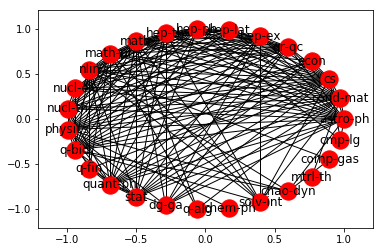

In [385]:
for field in  df["Fields"].values:
    field_list = field.split(";")
    field_pair = itertools.combinations(field_list, 2)
    G.add_edges_from(field_pair)
    
nx.draw_networkx(G,pos = nx.circular_layout(G),with_labels=True)
plt.show()
# G.edges
# test = df["Fields"].values[1].split(";")
# test2 = list(itertools.combinations(test,2))

In [386]:
# making dictionary mapping a cat to a number
cat_dict = {}
for (i, v) in enumerate(all_cat):
    cat_dict.update({v:i})

In [387]:
cat_dict

{'astro-ph': 0,
 'cond-mat': 1,
 'cs': 2,
 'econ': 3,
 'gr-qc': 4,
 'hep-ex': 5,
 'hep-lat': 6,
 'hep-ph': 7,
 'hep-th': 8,
 'math': 9,
 'math-ph': 10,
 'nlin': 11,
 'nucl-ex': 12,
 'nucl-th': 13,
 'physics': 14,
 'q-bio': 15,
 'q-fin': 16,
 'quant-ph': 17,
 'stat': 18}

In [388]:
df["Fields"].values[1]

'math;math;math;physics;math;cs;math;math;math;math'

In [405]:
# Initialize adjacency matrix
n   = len(cat_dict)
mat = np.zeros((n, n))

for (i, fields) in enumerate(df["Fields"].values):
    try:
        field_list       = fields.split(";")
        field_list_index = list(map(lambda x: cat_dict[x], field_list))
        for pair in itertools.combinations(field_list_index, 2):
            i, j = pair
#             print(pair)
            mat[i, j] +=1
            mat[j, i] +=1
    except KeyError as e:
        print(i, "---", e)
#         print(fields, "---", e)
        pass
        

In [415]:
pd.DataFrame(mat, columns=cat_dict.keys(), index = cat_dict.keys())

,astro-ph,cond-mat,cs,econ,gr-qc,hep-ex,hep-lat,hep-ph,hep-th,math,math-ph,nlin,nucl-ex,nucl-th,physics,q-bio,q-fin,quant-ph,stat
astro-ph,580.0,258.0,183.0,0.0,55.0,21.0,7.0,53.0,18.0,248.0,12.0,28.0,23.0,29.0,169.0,16.0,0.0,24.0,4.0
cond-mat,258.0,1272.0,186.0,0.0,62.0,34.0,2.0,69.0,28.0,382.0,16.0,60.0,15.0,35.0,282.0,117.0,0.0,80.0,9.0
cs,183.0,186.0,1216.0,1.0,31.0,14.0,42.0,56.0,73.0,322.0,13.0,33.0,6.0,4.0,110.0,28.0,6.0,49.0,30.0
econ,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,1.0
gr-qc,55.0,62.0,31.0,0.0,352.0,5.0,8.0,7.0,26.0,124.0,4.0,2.0,10.0,5.0,50.0,5.0,0.0,51.0,4.0
hep-ex,21.0,34.0,14.0,0.0,5.0,20.0,0.0,16.0,10.0,78.0,1.0,1.0,21.0,4.0,40.0,9.0,0.0,3.0,2.0
hep-lat,7.0,2.0,42.0,0.0,8.0,0.0,208.0,11.0,8.0,21.0,0.0,0.0,21.0,0.0,4.0,1.0,0.0,0.0,0.0
hep-ph,53.0,69.0,56.0,0.0,7.0,16.0,11.0,330.0,87.0,43.0,5.0,3.0,40.0,47.0,59.0,4.0,0.0,13.0,3.0
hep-th,18.0,28.0,73.0,0.0,26.0,10.0,8.0,87.0,390.0,159.0,11.0,9.0,8.0,14.0,35.0,5.0,0.0,5.0,5.0
math,248.0,382.0,322.0,2.0,124.0,78.0,21.0,43.0,159.0,4186.0,78.0,26.0,38.0,29.0,290.0,105.0,0.0,67.0,89.0


In [413]:
mat.sum()/2

10759.0

individual author > 18 dim - > K-means
taxi-cab metrix

clustering on proportion data

number of paper in a field / total number of papers that author has published